In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [68]:
df=pd.read_csv('/Users/haricharan/Downloads/clustering/dataset/few ext.csv')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22589 entries, 0 to 22588
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        22589 non-null  int64  
 1   Vehicle No        22589 non-null  object 
 2   SENSOR_ID         22589 non-null  object 
 3   I Batt High (A)   22589 non-null  float64
 4   I Batt Low (A)    22589 non-null  float64
 5   SOH COR           22589 non-null  float64
 6   Voltage (V)       22589 non-null  float64
 7   I_Batt_Total      22589 non-null  float64
 8   SOC (%)           22589 non-null  float64
 9   Ri                22589 non-null  float64
 10  SOH SUL           22589 non-null  float64
 11  SOH_LAM           22589 non-null  float64
 12  Temperature (°C)  22589 non-null  float64
 13  SOC (%).1         22589 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 2.4+ MB


In [70]:
df.drop('Unnamed: 0' , axis=1, inplace = True)
vehicleno=df['Vehicle No']
sensorid=df['SENSOR_ID']
df.drop('Vehicle No' , axis=1, inplace = True)
df.drop('SENSOR_ID' , axis=1, inplace = True)

In [86]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1','P2'] 
X_principal.head(1)

P1        P2
0  0.69174  0.433266

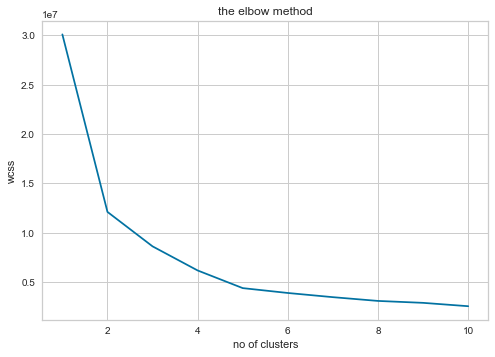

In [87]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

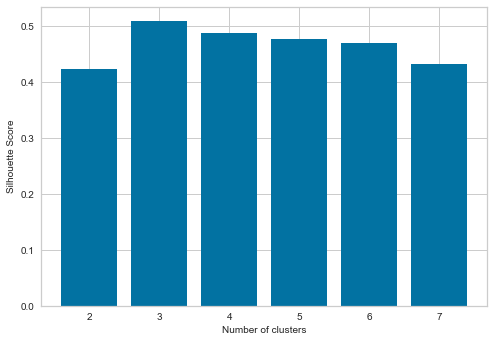

In [88]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal,KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [74]:
max_value = max(silhouette_scores)
max_index =  silhouette_scores.index(max_value)
print(k[max_index])

3


In [75]:
cluster = KMeans(n_clusters=k[max_index],random_state=42)
cluster_labels= cluster.fit_predict(df)
print(cluster_labels)

[1 1 1 ... 1 1 1]


In [76]:
x=pd.DataFrame()
x['clusterlabels']=cluster_labels

In [77]:
df1 = pd.DataFrame()
df1=pd.concat([vehicleno,sensorid,df,x],axis=1)

In [53]:
df1.columns

Index(['Vehicle No', 'SENSOR_ID', 'I Batt High (A)', 'I Batt Low (A)',
       'SOH COR', 'Voltage (V)', 'I_Batt_Total', 'SOC (%)', 'Ri', 'SOH SUL',
       'SOH_LAM', 'Temperature (°C)', 'SOC (%).1', 'clusterlabels'],
      dtype='object')

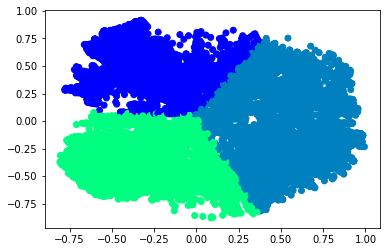

In [78]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = k[max_index]).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

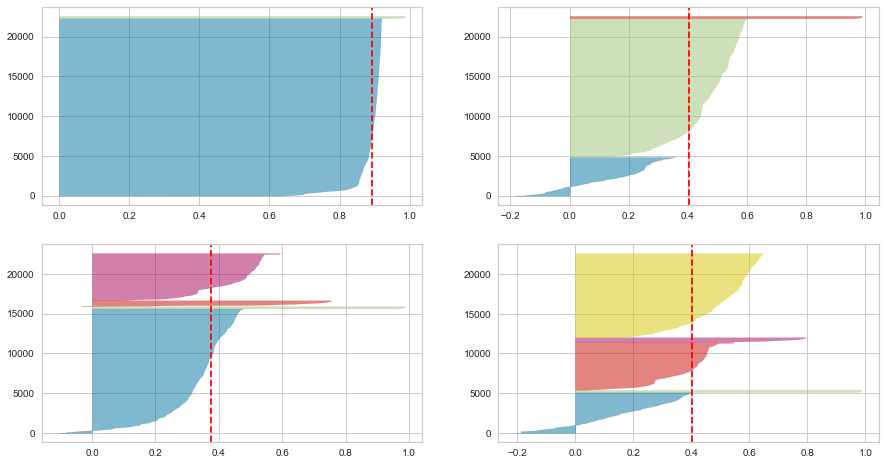

In [80]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)

In [81]:
cluster = KMeans(n_clusters=k[max_index],random_state=42)
cluster_labels= cluster.fit_predict(df)
print(cluster_labels)

[1 1 1 ... 1 1 1]


In [82]:
x=pd.DataFrame()
x['clusterlabels']=cluster_labels

In [83]:
df1 = pd.DataFrame()
df1=pd.concat([vehicleno,sensorid,df,x],axis=1)

In [84]:
df1.columns

Index(['Vehicle No', 'SENSOR_ID', 'I Batt High (A)', 'I Batt Low (A)',
       'SOH COR', 'Voltage (V)', 'I_Batt_Total', 'SOC (%)', 'Ri', 'SOH SUL',
       'SOH_LAM', 'Temperature (°C)', 'SOC (%).1', 'clusterlabels'],
      dtype='object')

In [85]:
df1.to_csv('clustered data.csv')